In [1]:
import numpy as np
import matplotlib.pyplot as plt
from auxiliar_scripts.nlk import Wire, NLK
import pandas as pd
plt.style.use(['notebook'])

Loading NLK profile from project data

In [7]:
data = pd.read_csv('auxiliar_scripts/nlk_profile.txt', delimiter='\t', decimal=',', header=None, dtype='float')

In [8]:
data_nmp = data.to_numpy()

In [9]:
x_proj, field_proj = data_nmp[:, 0], data_nmp[:, 1]

Computing the field from the model without and with errors

In [2]:
nlk = NLK(errors=False)
x, field = nlk.nlk_profile()

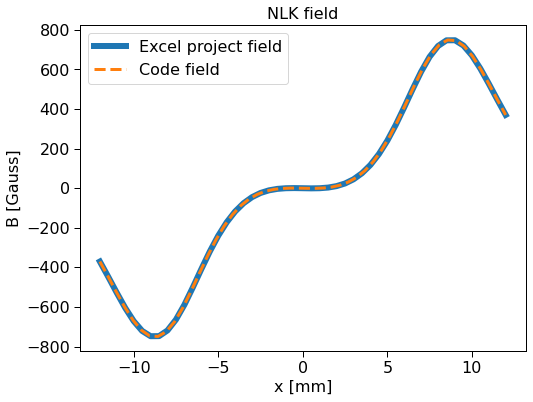

In [22]:
fig, ax = plt.subplots()
ax.plot(x_proj, -field_proj, label='Excel project field', lw=6)
ax.plot(x*1e3, field*10000, label = 'Code field', ls='--', lw=3)
ax.set_ylabel('B [Gauss]')
ax.set_xlabel('x [mm]')
ax.set_title('NLK field')
plt.legend()
plt.show()

In [49]:
sigma = 5e-4
nlk = NLK(errors=True, sigma_errors=sigma)
x, field = nlk.nlk_profile()

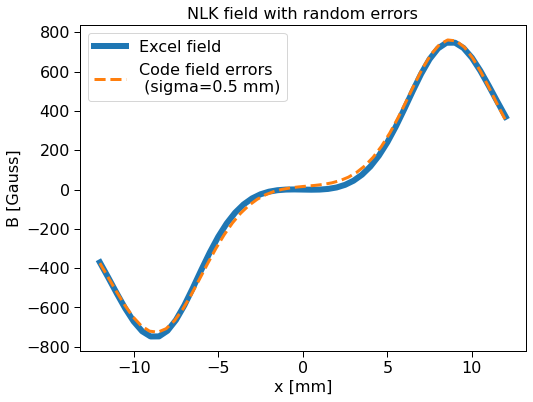

In [50]:
fig, ax = plt.subplots()
ax.plot(x_proj, -field_proj, label='Excel field', lw=6)
ax.plot(x*1e3, field*10000, label = f'Code field errors \n (sigma={sigma*1e3:.1f} mm)', ls='--', lw=3)
ax.set_ylabel('B [Gauss]')
ax.set_xlabel('x [mm]')
ax.set_title('NLK field with random errors')
plt.legend()
plt.show()